# Librerias y funciones necesarias

Las siguientes librerias son comunes en entornos de programación en Python, especialmente en el contexto de análisis de datos y ciencia de datos.

* **Pandas (import pandas as pd):**
>Pandas es una biblioteca de Python que proporciona estructuras de datos flexibles y herramientas de análisis de datos. La importación as pd es una convención común para abreviar el nombre de la biblioteca y hacer que el código sea más conciso. Pandas es ampliamente utilizado para manipular y analizar conjuntos de datos tabulares.

* **NumPy (import numpy as np):**
>NumPy es una biblioteca fundamental en Python para realizar operaciones numéricas. Proporciona un conjunto de funciones y herramientas para trabajar con arreglos y matrices multidimensionales, lo que lo hace esencial para la computación científica y el análisis de datos. La importación as np es una convención común para abreviar el nombre de la biblioteca y facilitar la escritura de código. NumPy es ampliamente utilizado en el ámbito de la ciencia de datos, aprendizaje automático y otras disciplinas relacionadas con el análisis numérico.

* **%load_ext autoreload y %autoreload 2:**
>Estos comandos son específicos de los cuadernos Jupyter y se utilizan para recargar automáticamente módulos antes de ejecutar una celda. %load_ext autoreload habilita la recarga automática de módulos, y %autoreload 2 configura la recarga automática para que sea más agresiva y recargue incluso las funciones de los módulos.

* **Warnings (import warnings):**
>El módulo warnings proporciona herramientas para controlar las advertencias que emite Python. En este caso, se está configurando para ignorar las advertencias, lo cual puede ser útil para evitar que las advertencias llenen la salida de la consola y distraigan durante la ejecución del código.
En resumen, estas importaciones son comunes en entornos de análisis de datos y ciencia de datos en Python, y proporcionan herramientas para manipular datos, trabajar con JSON, analizar expresiones regulares y controlar advertencias. Además, los comandos %load_ext autoreload y %autoreload 2 son específicos de los cuadernos Jupyter y se utilizan para facilitar el desarrollo interactivo.

In [ ]:
# Importa la biblioteca NumPy para soporte de arrays y matrices
import numpy as np
# Importa la biblioteca pandas para manipulación y análisis de datos
import pandas as pd
# Importa datetime y time para trabajar con objetos de fecha y hora
from datetime import datetime, time
# Importa matplotlib.pyplot para la creación de gráficos estáticos, animados e interactivos
import matplotlib.pyplot as plt
# Importa seaborn, una biblioteca de visualización de datos basada en matplotlib, para hacer gráficos más atractivos
import seaborn as sns
# Importa el módulo calendar, que proporciona funciones relacionadas con la visualización y manipulación de calendarios y fechas.
import calendar
# Importa el módulo cm de matplotlib, que es parte de la biblioteca de visualización matplotlib.
import matplotlib.cm as cm
# Importa la biblioteca folium para la creación de mapas interactivos y su plugin HeatMap para visualizaciones de densidad.
import folium
from folium.plugins import HeatMap
# Activa la extensión autoreload para recargar módulos automáticamente antes de ejecutar el código
%load_ext autoreload
# Configura autoreload para que recargue módulos cada vez que se ejecuta una celda
%autoreload 2
# Importa la biblioteca warnings para controlar las advertencias
import warnings
# Ignora todas las advertencias generadas para mantener limpia la salida del notebook
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Funcion verificar_tipos_datos**

La función verificar_tipo_datos toma un DataFrame de Pandas como entrada y realiza un análisis detallado de cada columna. Genera un resumen que incluye el nombre de la columna, el tipo de datos, el porcentaje de valores no nulos, el porcentaje de valores nulos y la cantidad de valores nulos para cada columna. Además, la función imprime el total de valores nulos en todo el DataFrame y muestra las columnas con valores nulos ordenadas de mayor a menor según el porcentaje de valores nulos. El resultado es un DataFrame que proporciona una visión detallada de la calidad de los datos en el DataFrame original.

In [ ]:
def verificar_tipo_datos(df):
    # Diccionario para almacenar información sobre cada columna
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    # Iterar sobre todas las columnas del DataFrame df
    for columna in df.columns:
        # Calcular el porcentaje de valores no nulos en la columna actual
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100

        # Agregar información al diccionario
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100 - porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    # Crear un DataFrame con la información recopilada
    df_info = pd.DataFrame(mi_dict)

    # Calcular el total de valores nulos en el DataFrame
    total_nulos = df.isnull().sum().sum()

    # Imprimir el total de valores nulos
    print(f'Total de valores nulos en el DataFrame: {total_nulos}')

    # Mostrar las columnas con valores nulos y sus respectivos porcentajes (ordenadas de mayor a menor)
    columnas_con_nulos = df_info[df_info["nulos"] > 0][["nombre_campo", "nulos_%"]].sort_values(by="nulos_%", ascending=False)
    if not columnas_con_nulos.empty:
        print("\nColumnas con valores nulos y sus porcentajes:")
        print(columnas_con_nulos)

    # Devolver el DataFrame con la información de cada columna
    return df_info


**Verificar duplicados por columnas**

La siguiente función proporciona una herramienta util para identificar y ordenar las filas duplicadas de un DataFrame de Pandas en función de los valores de una columna específica. En nuestro caso puede ser útil para el análisis de datos cuando se desea examinar y manejar duplicados en función de una columna particular.

In [ ]:
def verifica_duplicados_por_columna(df, columna):

    # Se filtran las filas duplicadas
    duplicated_rows = df[df.duplicated(subset=columna, keep=False)]
    if duplicated_rows.empty:
        return "No hay duplicados"

    # se ordenan las filas duplicadas para comparar entre sí
    duplicated_rows_sorted = duplicated_rows.sort_values(by=columna)
    return duplicated_rows_sorted

**Obtener tipo de datos**

Esta función, llamada obtener_tipos_de_datos, toma un DataFrame de pandas como entrada y devuelve un nuevo DataFrame que contiene información sobre los tipos de datos presentes en cada columna del DataFrame original.

In [ ]:
def obtener_tipos_de_datos(dataframe):
    # Inicializa una lista vacía para almacenar la información de tipos de datos
    tipos_de_datos = []

    # Itera sobre las columnas del DataFrame
    for columna in dataframe.columns:
        # Para cada columna, crea una lista de tipos de datos de los elementos en esa columna
        tipos = [str(type(dato)) for dato in dataframe[columna]]

        # Convierte la lista de tipos a un conjunto para eliminar duplicados y luego vuelve a convertir a lista
        tipos_unicos = list(set(tipos))

        # Agrega un diccionario a la lista tipos_de_datos con el nombre de la columna y los tipos de datos únicos
        tipos_de_datos.append({
            'Columna': columna,
            'Tipo de dato': tipos_unicos
        })

    # Crea un nuevo DataFrame con la información de tipos_de_datos
    resultado = pd.DataFrame(tipos_de_datos)

    # Devuelve el DataFrame resultante
    return resultado

**Converir tiempo**

Esta función es flexible y trata de convertir la entrada en un objeto de tiempo, ya sea a partir de una cadena con formato específico o extrayendo el componente de tiempo de un objeto de fecha y hora. Si no puede realizar la conversión, devuelve None o el valor original, dependiendo del caso.

In [ ]:
def convertir_tiempo(x):
    # Comprueba si x es una instancia de str (cadena de caracteres)
    if isinstance(x, str):
        try:
            # Intenta convertir la cadena x en un objeto de tiempo utilizando strptime con el formato "%H:%M:%S"
            return datetime.strptime(x, "%H:%M:%S").time()
        except ValueError:
            # En caso de error (por ejemplo, si x no coincide con el formato "%H:%M:%S"), devuelve None
            return None
    # Comprueba si x es una instancia de datetime
    elif isinstance(x, datetime):
        # Si x es un objeto datetime, extrae y devuelve solo la parte de tiempo
        return x.time()
    # Si x no es ni cadena ni datetime, devuelve x sin cambios
    return x

**Imputa valor frecuente**

Esta función reemplaza los valores "SD" con NaN en la columna especificada,
luego calcula el valor más frecuente en esa columna y utiliza ese valor
para imputar los valores faltantes (NaN).

In [ ]:
def imputa_valor_frecuente(df, columna):

    # Se reemplaza "SD" con NaN en la columna
    df[columna] = df[columna].replace('SD', pd.NA)

    # Se calcula el valor más frecuente en la columna
    valor_mas_frecuente = df[columna].mode().iloc[0]
    print(f'El valor mas frecuente es: {valor_mas_frecuente}')

    # Se imputan los valores NaN con el valor más frecuente
    df[columna].fillna(valor_mas_frecuente, inplace=True)

**Imputa edad media segun sexo**

Esta función reemplaza los valores "SD" con NaN en la columna 'Edad', calcula la edad promedio
para cada grupo de género (Femenino y Masculino), imprime los promedios calculados y
luego llena los valores faltantes en la columna 'Edad' utilizando el promedio correspondiente
al género al que pertenece cada fila en el DataFrame.

In [ ]:
def imputa_edad_media_segun_sexo(df):

    # Se reemplaza "SD" con NaN en la columna 'edad'
    df['Edad'] = df['Edad'].replace('SD', pd.NA)

    # Se calcula el promedio de edad para cada grupo de género
    promedio_por_genero = df.groupby('Sexo')['Edad'].mean()
    print(f'La edad promedio de Femenino es {round(promedio_por_genero["FEMENINO"])} y de Masculino es {round(promedio_por_genero["MASCULINO"])}')

    # Se llenan los valores NaN en la columna 'edad' utilizando el promedio correspondiente al género
    df['Edad'] = df.apply(lambda row: promedio_por_genero[row['Sexo']] if pd.isna(row['Edad']) else row['Edad'], axis=1)
    # Lo convierte a entero
    df['Edad'] = df['Edad'].astype(int)

# Abrimos nuestro archivo `1_homicidios_limpio`

Accedemos al archivo que guardamos en el primer paso [01_ETL.ipynb](https://colab.research.google.com/drive/1_EVoakHeukOOGp76xDbvpD7XAE0j4U4G?usp=drive_link)

In [ ]:
# Dirección del archivo CSV
direccion_csv = '/content/drive/MyDrive/Henry - Proyecto N°2 - Data Analysis/Datasets/1_homicidios_limpio.csv'

# Leer el archivo CSV y cargarlo en un DataFrame
df_homicidios = pd.read_csv(direccion_csv)

In [ ]:
# Eliminamos la columna 'Unnamed: 0'
df_homicidios = df_homicidios.drop('Unnamed: 0', axis=1)

In [ ]:
# Selecciona una muestra aleatoria de 5 filas del DataFrame df_homicidios, utilizando una semilla (random_state) de 5 para garantizar la reproducibilidad de los resultados.
df_homicidios.sample(5,random_state=5)

,Id,Rol,Sexo,Edad,N victimas,Fecha,Año,Mes,Día,Hora,...,Participantes,Víctima,Acusado,Barrios,Año 2016,Año 2017,Año 2018,Año 2019,Año 2020,Año 2021
630,2021-0013,CONDUCTOR,MASCULINO,41,1,2021-01-31,2021,1,31,06:10:00,...,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,170163,170282,170394,170497,170592,170677
89,2016-0115,CONDUCTOR,MASCULINO,39,1,2016-09-02,2016,9,2,11:50:00,...,SD-CARGAS,SD,CARGAS,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,213576,213914,214229,214518,214777,215002
71,2016-0095,CONDUCTOR,MASCULINO,29,1,2016-07-23,2016,7,23,06:12:00,...,MOTO-AUTO,MOTO,AUTO,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,189956,189986,190016,190046,190076,190105
37,2016-0050,PEATON,MASCULINO,78,1,2016-04-19,2016,4,19,09:50:00,...,PEATON-PASAJEROS,PEATON,PASAJEROS,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,225737,226649,227495,228266,228953,229541
427,2018-0138,PASAJERO_ACOMPAÑANTE,FEMENINO,79,1,2018-12-21,2018,12,21,09:30:00,...,PASAJEROS-PASAJEROS,PASAJEROS,PASAJEROS,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,170163,170282,170394,170497,170592,170677


# Introducción al Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una fase crucial en el proceso de análisis de datos que busca comprender la naturaleza y las características de un conjunto de datos antes de aplicar modelos más avanzados o llegar a conclusiones. En este EDA, nos enfocaremos en un conjunto de datos relacionado con incidentes viales, abordando diferentes aspectos para extraer información valiosa y patrones significativos. El objetivo principal es proporcionar una visión comprehensiva de los incidentes, identificando tendencias, relaciones y posibles áreas de intervención para mejorar la seguridad vial.

## Distribución anual de accidentes


Para iniciar podemos ver la distribución anual de accidentes y vemos claramanente como alrededor del año 2020 se reduce significativamente por el inicio de la pandemia.

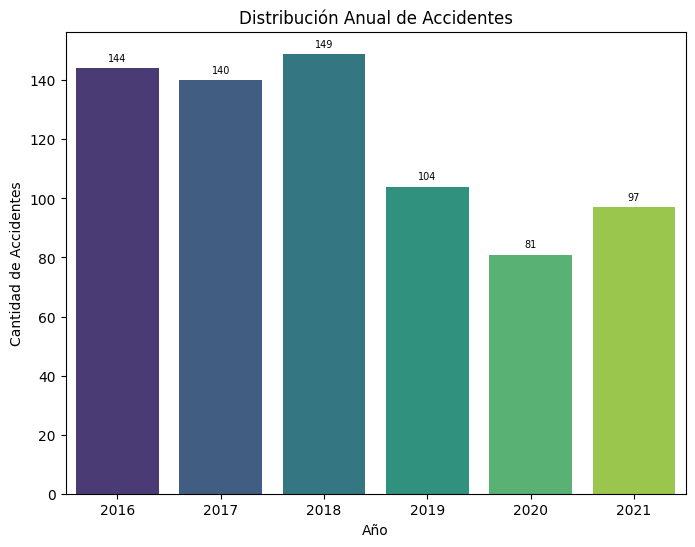

In [ ]:
# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(8, 6))

# Crea un gráfico de barras con la cantidad de homicidios por año, utilizando la paleta de colores 'viridis'
ax = sns.countplot(x=df_homicidios['Año'], palette='viridis')

# Establece el título del gráfico
plt.title('Distribución Anual de Accidentes')

# Establece la etiqueta del eje X
plt.xlabel('Año')

# Establece la etiqueta del eje Y
plt.ylabel('Cantidad de Accidentes')

# Itera sobre las barras del gráfico para agregar la cantidad de accidentes sobre cada barra
for p in ax.patches:
    # Anota el valor de la altura de la barra (cantidad de accidentes) sobre ella
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=7)  # Ajusta el tamaño del texto aquí

# Muestra el gráfico
plt.show()

Al examinar la distribución anual de todos los datos disponibles, se nota que hay una tendencia de aumento en los accidentes durante el año, alcanzando su punto máximo en diciembre. Los meses de diciembre, noviembre y agosto son los que registran mayor número de accidentes fatales, mientras que julio y septiembre presentan la menor cantidad de estos incidentes.




Para analizar mas profundo año por año la distribución de accidentes vamos a verlo año por año como es la tendencia, volviendo a ver como se aplana en el 2020 por la pandemia como mencionabamos anteriormente.

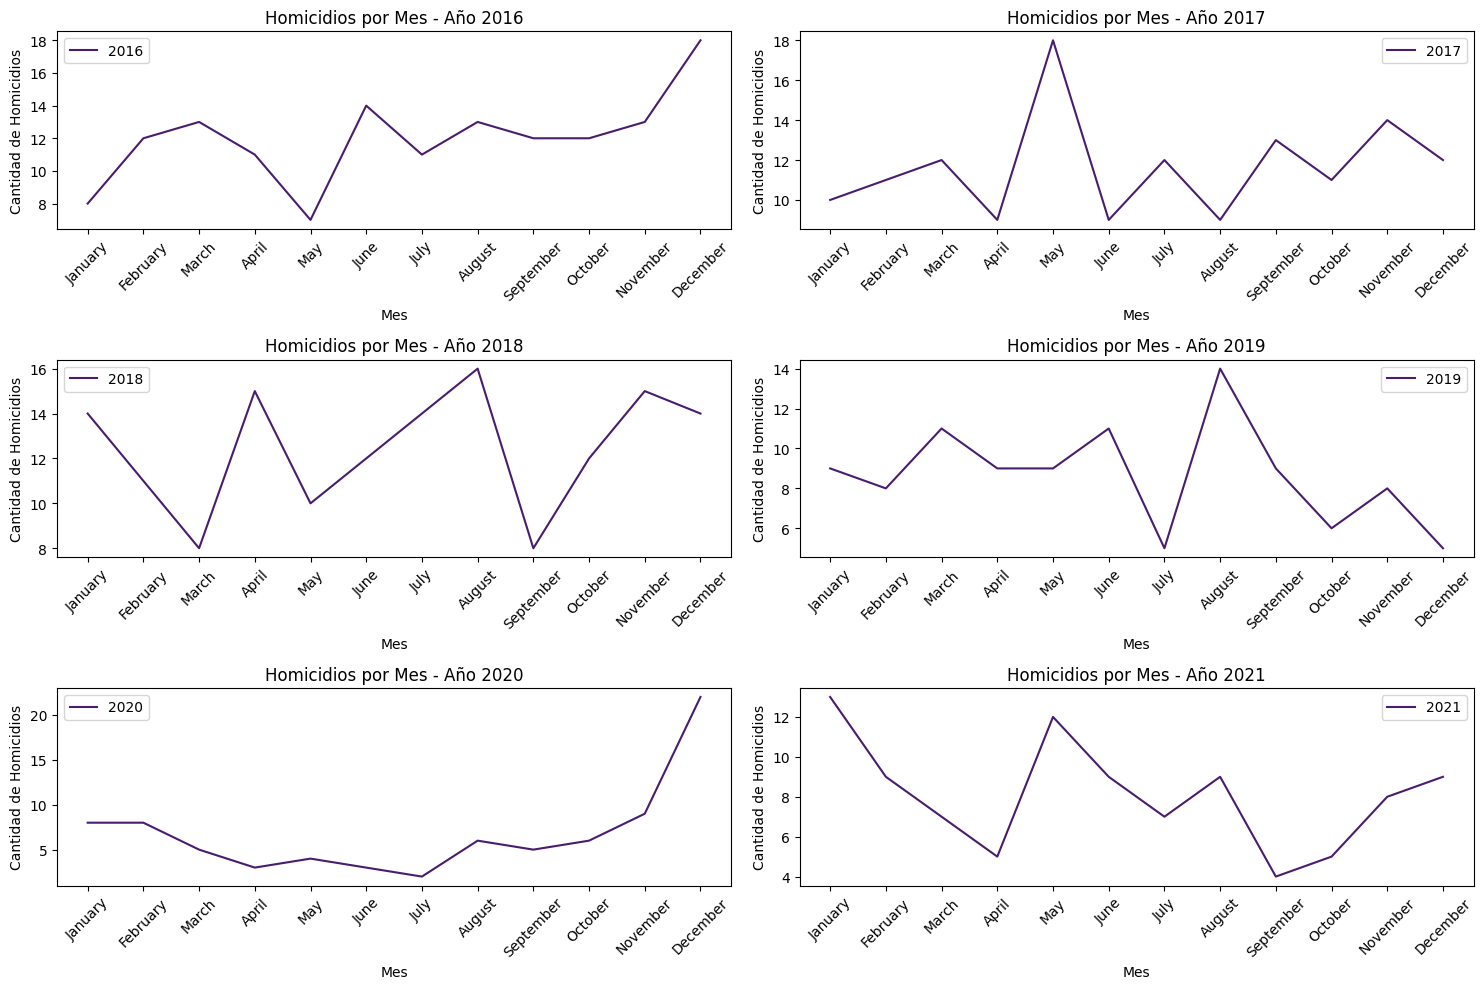

In [ ]:
# Convertir la columna 'Fecha' a tipo datetime
df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])

# Crear columnas de 'Año' y 'Mes' como enteros
df_homicidios['Año'] = df_homicidios['Fecha'].dt.year
df_homicidios['Mes'] = df_homicidios['Fecha'].dt.month

# Configurar el estilo de seaborn para usar los colores de viridis
sns.set_palette("viridis", n_colors=12)

# Obtener los años únicos presentes en la columna 'Año'
unique_years = df_homicidios['Año'].unique()

# Crear subgráficos en una matriz de 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Iterar sobre cada año
for i, year in enumerate(unique_years):
    # Calcular la posición en la matriz
    row = i // 2
    col = i % 2

    # Filtrar el DataFrame para el año actual
    df_year = df_homicidios[df_homicidios['Año'] == year]

    # Contar los homicidios por mes
    count_by_month = df_year.groupby('Mes').size()

    # Crear el gráfico de líneas
    sns.lineplot(x=count_by_month.index.map(lambda x: calendar.month_name[x]), y=count_by_month.values, ax=axes[row, col], label=str(year))

    # Configurar etiquetas y título
    axes[row, col].set_title(f'Homicidios por Mes - Año {year}')
    axes[row, col].set_ylabel('Cantidad de Homicidios')

    # Rotar las etiquetas de los meses a 45 grados
    axes[row, col].tick_params(axis='x', rotation=45)

# Configurar etiquetas en el eje x para el último subgráfico
axes[-1, 0].set_xlabel('Mes')
axes[-1, 1].set_xlabel('Mes')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


Analizando las gráficas anteriores, no se identifica un patrón consistente de accidentes fatales mes a mes a lo largo de diferentes años; es decir, los meses con mayor número de accidentes fatales varían de un año a otro. Sin embargo, es evidente una reducción significativa en los accidentes fatales desde diciembre de 2019 hasta noviembre de 2020, lo cual se asocia a las restricciones de movilidad impuestas por la cuarentena durante la pandemia de COVID-19.






## Distribución mensual de accidentes

Este proceso ayuda a entender cómo se distribuyen los homicidios a lo largo de los meses del año, ofreciendo insights visuales que pueden ser útiles para análisis adicionales, como identificar tendencias estacionales o planificar recursos de manera más efectiva. Tambien convertimos los meses de número a mes calendario (llamado por su nombre).


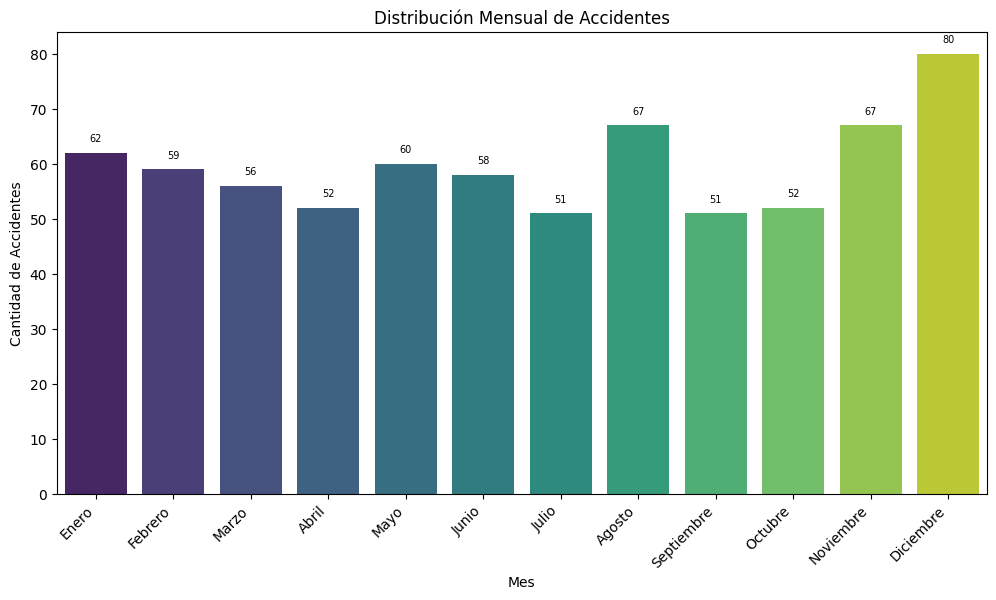

In [ ]:
# Define un diccionario que asocia cada número de mes con su nombre correspondiente en español
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Usa el diccionario 'meses' para convertir los números de mes en nombres en la columna 'Mes' del DataFrame 'df_homicidios'
df_homicidios['Mes'] = df_homicidios['Mes'].map(meses)

# Establece el tamaño de la figura del gráfico a 12x6 pulgadas
plt.figure(figsize=(12, 6))

# Crea un gráfico de barras que cuenta la cantidad de registros por cada mes, usando la paleta de colores 'viridis'
ax = sns.countplot(x=df_homicidios['Mes'], palette='viridis')

# Rota las etiquetas del eje x en un ángulo de 45 grados para mejorar la legibilidad y alinea a la derecha
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Itera sobre las barras del gráfico para colocar una anotación con el total de registros encima de cada barra
for p in ax.patches:
    # Coloca una etiqueta con el número total de registros encima de cada barra, ajustando la posición y el tamaño del texto
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

# Asigna un título al gráfico, indicando que muestra la distribución mensual de accidentes
plt.title('Distribución Mensual de Accidentes')

# Etiqueta el eje x como 'Mes'
plt.xlabel('Mes')

# Etiqueta el eje y como 'Cantidad de Accidentes'
plt.ylabel('Cantidad de Accidentes')

# Muestra el gráfico
plt.show()


Al analizar la distribución anual de todos los registros disponibles, se destaca un incremento notable en los accidentes durante diciembre. Los meses que presentan una mayor incidencia de accidentes fatales son diciembre, noviembre y agosto, mientras que julio y septiembre son los meses con la menor cantidad de accidentes fatales registrados.







## Distribución semanal de accidentes

Vemos como se disrtibuyen los accidentes en base a la semana de lunes a domingo

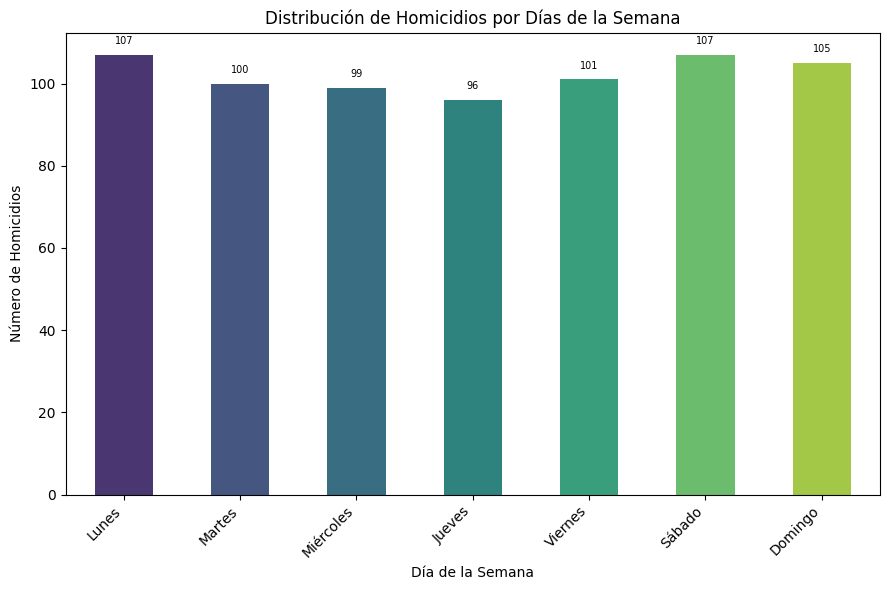

In [ ]:
# Convertir la columna 'Fecha' a datetime si aún no lo está
df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])

# Extraer el día de la semana en inglés
df_homicidios['Dia_de_la_Semana'] = df_homicidios['Fecha'].dt.day_name()

# Mapear los días de la semana del inglés al español
dias_en_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df_homicidios['Dia_de_la_Semana'] = df_homicidios['Dia_de_la_Semana'].map(dias_en_espanol)

# Contar los homicidios por día de la semana
dias_semana_counts = df_homicidios['Dia_de_la_Semana'].value_counts()[list(dias_en_espanol.values())]

# Crear el gráfico
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=dias_semana_counts.index, y=dias_semana_counts.values, palette='viridis',width=0.5)
plt.title('Distribución de Homicidios por Días de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Homicidios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Agregar el total en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

plt.tight_layout()
plt.show()


Considerando el total de los registros, la distribución de los accidentes tienden a registrarse entre los viernes a lunes, con el máximo regristrado el día Sábado y el mínimo el día Jueves. Sin embargo, la diferencia entre las cantidades mínima y máxima registrada en la semana es del 11.5% solamente.



## Distribución diaria de accidentes


Vamos a explorar cómo se distribuyen los accidentes a lo largo de los días del mes mediante un gráfico de barras. Este enfoque nos permitirá identificar si existen días específicos con tasas de accidentes notablemente altas o bajas. La visualización de datos, en este caso, es una herramienta poderosa para revelar patrones que no son evidentes solo mirando las cifras brutas. Por ejemplo, podríamos descubrir si los finales de mes presentan más incidentes o si la distribución es relativamente uniforme.

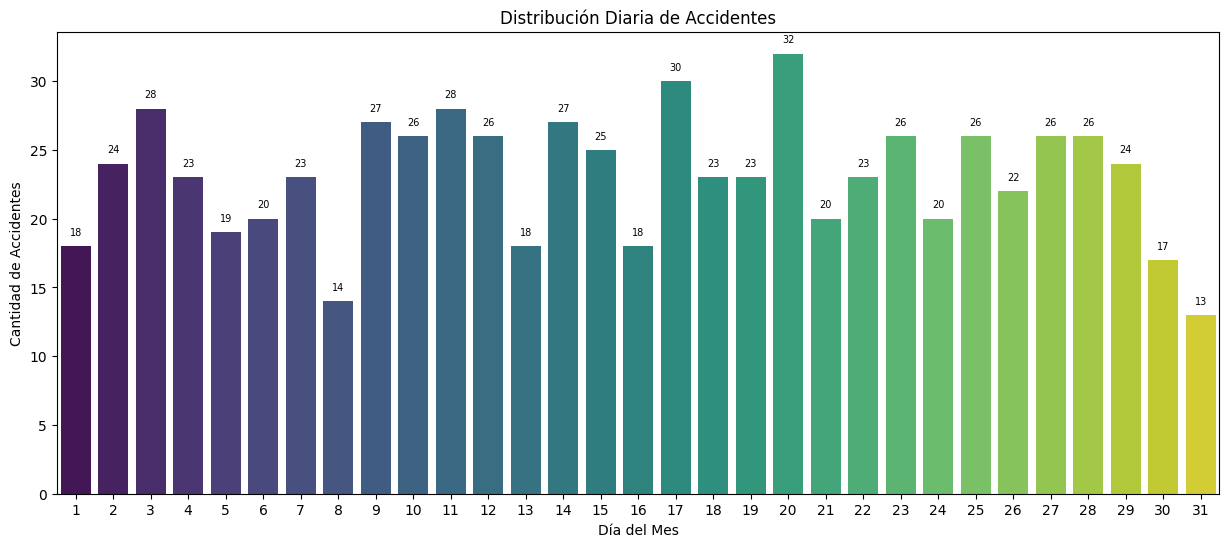

In [ ]:
# Importa las bibliotecas necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño de la figura para el gráfico, con un ancho de 15 pulgadas y una altura de 6 pulgadas. Esto asegura que haya espacio suficiente para visualizar claramente todos los datos.
plt.figure(figsize=(15, 6))

# Utiliza seaborn para crear un gráfico de barras que cuenta el número de accidentes por cada día del mes. La columna 'Día' del DataFrame df_homicidios se usa como eje X. La paleta 'viridis' aplica un esquema de colores para las barras.
ax = sns.countplot(x=df_homicidios['Día'], palette='viridis')

# Establece el título del gráfico para proporcionar un contexto claro sobre lo que se está visualizando.
plt.title('Distribución Diaria de Accidentes')

# Etiqueta el eje X como 'Día del Mes' para indicar que las barras representan días específicos del mes.
plt.xlabel('Día del Mes')

# Etiqueta el eje Y como 'Cantidad de Accidentes' para mostrar que la altura de cada barra representa el número total de accidentes ocurridos en ese día específico.
plt.ylabel('Cantidad de Accidentes')

# Itera sobre cada barra en el gráfico (cada "parche" representa una barra) para agregar una anotación con el total de accidentes.
for p in ax.patches:
    # La anotación se coloca justo encima de cada barra. str(int(p.get_height())) convierte la altura de la barra (el conteo de accidentes) a texto. La posición se calcula para centrar el texto en la parte superior de la barra.
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)  # El texto se ajusta para que aparezca 10 puntos por encima de la barra.

# Muestra el gráfico. Este paso es necesario para visualizar el gráfico cuando se usa un entorno de programación que no lo hace automáticamente después de cada celda o bloque de código.
plt.show()


## Distribución horaria de accidentes

Este gráfico proporciona una visión clara de cómo la frecuencia de accidentes varía por hora, resaltando posibles picos durante ciertas horas del día que podrían correlacionarse con el volumen de tráfico, actividades humanas o condiciones ambientales específicas. Al visualizar estos datos, los responsables de la toma de decisiones pueden identificar horas críticas que requieren atención especial en términos de recursos de emergencia o iniciativas de prevención de accidentes.

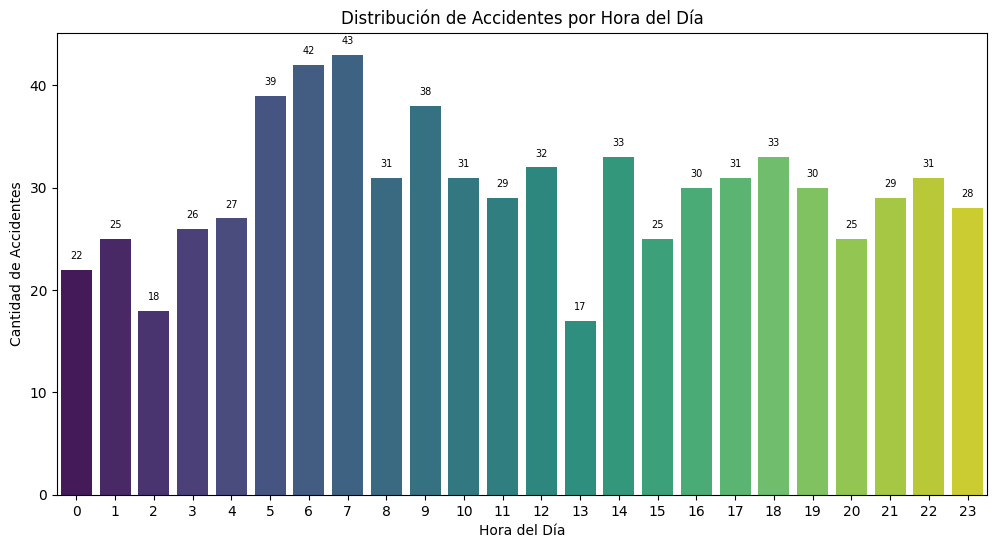

In [ ]:
# Importa las bibliotecas necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño de la figura para el gráfico. Un ancho de 12 pulgadas y una altura de 6 pulgadas proporcionan suficiente espacio para una clara visualización de los datos.
plt.figure(figsize=(12, 6))

# Utiliza seaborn para crear un gráfico de barras que muestra el conteo de accidentes por cada hora del día. La columna 'Hora entera' del DataFrame 'df_homicidios' se usa como eje X. La paleta de colores 'viridis' se utiliza para las barras.
ax = sns.countplot(x=df_homicidios['Hora entera'], palette='viridis')

# Establece el título del gráfico, 'Distribución de Accidentes por Hora del Día', para proporcionar contexto sobre lo que se está mostrando.
plt.title('Distribución de Accidentes por Hora del Día')

# Etiqueta el eje X como 'Hora del Día' para indicar que las barras representan diferentes horas del día.
plt.xlabel('Hora del Día')

# Etiqueta el eje Y como 'Cantidad de Accidentes' para mostrar que la altura de cada barra representa el número total de accidentes ocurridos en esa hora específica.
plt.ylabel('Cantidad de Accidentes')

# Itera sobre cada barra (cada "parche") en el gráfico para agregar una anotación con el total de accidentes.
for p in ax.patches:
    # Coloca una anotación con el número total de accidentes (altura de la barra) encima de cada barra. La posición se centra en la barra, y el texto se ajusta para aparecer 10 puntos por encima de la cima de la barra.
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

# Muestra el gráfico, lo cual es necesario para visualizarlo en entornos que no lo hacen automáticamente.
plt.show()


Con mas detalle, observando hora a hora la distribución de los accidentes, es posible identificar el horario entre las 5 a las 7 de la mañana como el de mayor cantidad de accidentes. Luego se observa un poco a las 9 de la mañana seguido de tres momentos puntuales como lo son las 14 hs, las 18 hs y las 22 hs.



## Distribución geográfica de accidentes

### Mapa de lugar de accidente

In [ ]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en Buenos Aires
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12.5)

# Agregar marcadores al mapa para cada accidente
for index, row in df_homicidios.iterrows():
    info = f"""
    Accidente:{row['Id']}
    Fecha:{row['Fecha']}
    Edad:{row['Edad']}
    """
    folium.Marker([row['Pos y'], row['Pos x']],
                  popup=folium.Popup(html=info, parse_html=True),
                  icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(mapa_buenos_aires)

# Mostrar el mapa en el cuaderno
mapa_buenos_aires


### Mapa de calor

Vamos a ver dos tipos de mapas de calor:


En este código, estamos creando una visualización interactiva usando la biblioteca Folium en Python, específicamente un mapa de Buenos Aires, Argentina, que muestra la ubicación de todos los accidentes. Cada accidente se marca en el mapa, proporcionando detalles como el ID del accidente, la fecha y la edad de la persona involucrada. Este tipo de visualización es extremadamente útil para análisis geográficos y estudios urbanos, permitiendo a los analistas, planificadores urbanos, y responsables de la toma de decisiones ver patrones espaciales de incidentes, identificar puntos críticos de alta incidencia, y potencialmente guiar la asignación de recursos o el diseño de intervenciones de seguridad vial.
<p/>

**Opción 1**: con libreria `folium`

In [ ]:
# Inicializa un objeto Map de Folium centrado en Buenos Aires, Argentina, con un nivel de zoom inicial de 12.5 para una vista detallada de la ciudad.
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12.5)

# Itera sobre cada fila del DataFrame 'df_homicidios' para agregar marcadores al mapa.
for index, row in df_homicidios.iterrows():
    # Prepara el contenido que se mostrará en el popup del marcador, incluyendo el ID del accidente, la fecha y la edad involucrada.
    info = f"""
    Accidente:{row['Id']}
    Fecha:{row['Fecha']}
    Edad:{row['Edad']}
    """
    # Crea un marcador en la ubicación especificada por las columnas 'Pos y' y 'Pos x' de la fila actual.
    # Configura un popup con la información del accidente y un icono rojo de advertencia.
    folium.Marker([row['Pos y'], row['Pos x']],
                  popup=folium.Popup(html=info, parse_html=True),
                  icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(mapa_buenos_aires)

# Muestra el mapa generado en el cuaderno de Jupyter. Al ejecutar esta celda en un cuaderno, se renderizará el mapa interactivo.
mapa_buenos_aires


En el siguiente código se utiliza la biblioteca Plotly Express para crear un mapa de calor interactivo basado en datos de homicidios, enfocándose en visualizar la frecuencia de estos eventos en diferentes ubicaciones geográficas mediante coordenadas. El mapa proporciona una representación gráfica intuitiva y visual de áreas con mayor incidencia de homicidios, utilizando una escala de colores para indicar la densidad de eventos. Al agrupar los datos por ubicación y contar la frecuencia de homicidios, se obtiene una visión clara de los puntos críticos dentro de la zona de estudio, en este caso, presumiblemente Buenos Aires. Este tipo de visualización es particularmente útil para autoridades de seguridad, planificadores urbanos, y analistas de datos, ya que facilita la identificación de áreas que podrían requerir mayor atención o recursos. Además, al ser interactivo, permite a los usuarios explorar los datos de manera más dinámica, ajustando el enfoque y el nivel de zoom para examinar áreas específicas con mayor detalle.

**Opción 2**: con libreria `plotly.express`

In [ ]:
# Importa Plotly Express, una biblioteca de visualización de datos interactiva y de alto nivel.
import plotly.express as px

# Agrupa el DataFrame 'df_homicidios' por las coordenadas de ubicación y calcula la frecuencia de homicidios para cada grupo. Luego, reinicia el índice para convertir el resultado en un DataFrame.
df_top_locations_freq = df_homicidios.groupby(['Pos y', 'Pos x']).size().reset_index(name='Frecuencia')

# Encuentra la máxima frecuencia de homicidios entre todas las ubicaciones para establecer un rango de colores adecuado en el mapa.
max_frequency = df_top_locations_freq['Frecuencia'].max()

# Utiliza Plotly Express para crear un mapa de calor interactivo. Las coordenadas latitudinales y longitudinales se especifican junto con 'z', que representa la intensidad o frecuencia de los homicidios en cada punto.
# Se configuran varios parámetros como el radio de influencia de cada punto, el centro y zoom inicial del mapa, el estilo del mapa, la opacidad de los puntos, el título, y una paleta de colores continua basada en tonos de rojo.
fig = px.density_mapbox(df_top_locations_freq, lat='Pos y', lon='Pos x', z='Frecuencia',
                        radius=35, center=dict(lat=-34.6037, lon=-58.3816),
                        zoom=10, mapbox_style='open-street-map',
                        opacity=0.7,  # Configura la opacidad de los puntos en el mapa de calor para mejorar la visualización.
                        title='Mapa de Calor Interactivo de Homicidios',
                        color_continuous_scale=px.colors.sequential.Reds,  # Selecciona una paleta de colores en tonos rojos para representar la frecuencia de homicidios.
                        range_color=(0, max_frequency))  # Ajusta el rango de colores para abarcar desde 0 hasta la máxima frecuencia de homicidios.

# Muestra el mapa de calor interactivo. Se especifican dimensiones para la visualización, aunque esta línea parece contener un error de sintaxis y no se ejecutará como se espera. En su lugar, debería ser simplemente `fig.show()`.
fig.show()


# Histograma de edad

Este código nos lleva a través de la creación de un análisis visual detallado de la distribución de edades de las víctimas de homicidios, utilizando un histograma enriquecido con colores y una línea de tendencia para resaltar los patrones subyacentes en los datos. Al aplicar técnicas de visualización avanzadas, como el coloreado de barras según un mapa de colores y la superposición de una curva de tendencia, el código no solo presenta la distribución de edades en forma bruta, sino que también intenta interpretar la distribución para revelar tendencias más sutiles. Este enfoque es particularmente útil en el campo de la criminología y la planificación de políticas públicas, donde entender la demografía de las víctimas puede informar estrategias de prevención y respuesta más efectivas. Además, la visualización de datos de esta manera facilita la comunicación de hallazgos complejos a un público más amplio, haciendo los datos accesibles y comprensibles para aquellos sin un trasfondo técnico en análisis de datos.

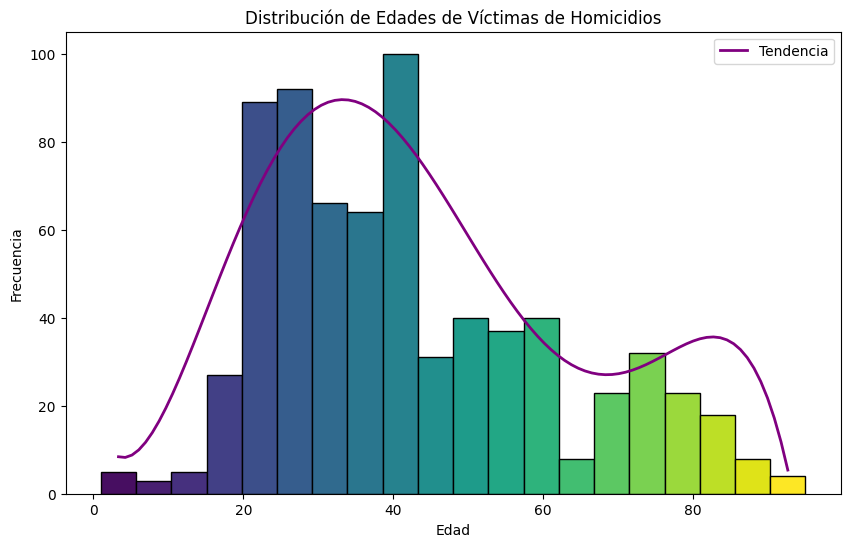

In [ ]:
# Convierte la columna 'Edad' a numérica, tratando los errores con 'coerce' para convertir valores no numéricos en NaN.
df_homicidios['Edad'] = pd.to_numeric(df_homicidios['Edad'], errors='coerce')

# Elimina las filas donde la edad es NaN, asegurando que solo se trabaje con datos completos para el análisis.
df_homicidios = df_homicidios.dropna(subset=['Edad'])

# Configura el tamaño de la figura para el histograma y crea el histograma con 20 barras, añadiendo bordes negros para una mejor definición visual de cada barra.
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_homicidios['Edad'], bins=20, edgecolor='black')

# Configura el colormap 'viridis' para colorear las barras del histograma, donde cada barra se colorea en función de su valor.
colormap = cm.viridis
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calcula el centro de cada barra para asignar colores.
colores = colormap(bin_centers / bin_centers.max())  # Normaliza los centros de las barras para el rango del colormap.

# Aplica el color calculado a cada barra del histograma.
for patch, color in zip(patches, colores):
    patch.set_facecolor(color)

# Ajusta y dibuja una curva de tendencia sobre el histograma. Se utiliza un polinomio de grado 5 para ajustar los centros de las barras y sus alturas.
x_vals = np.linspace(min(bin_centers), max(bin_centers), 100)
coefficients = np.polyfit(bin_centers, n, 5)  # Ajusta un polinomio de grado 5.
y_vals = np.polyval(coefficients, x_vals)  # Evalúa el polinomio ajustado.

# Dibuja la línea de tendencia sobre el histograma, ajustando la posición en el eje Y para mejorar la visualización.
plt.plot(x_vals, y_vals + 10, color='purple', linestyle='-', linewidth=2, label='Tendencia')

# Configura las etiquetas de los ejes y el título del gráfico para proporcionar contexto.
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de Víctimas de Homicidios')

# Añade una leyenda para explicar los elementos del gráfico.
plt.legend()

# Muestra el gráfico resultante.
plt.show()


Se puede apreciar en el gráfico anterior, que los accidentados son  menores de 60 años. No se observan edades atípicas. Si bien se observa un mínimo de 1 año y un máximo de 95 años, El histograma se observa con una distribución algo sesgada a la derecha, concentrando la mayor cantidad de accidentes entre los 20 a 40 años.

# Distribución de las edades de las víctimas segun los años

Ahora centramos en mostrar la distribución de las edades de las víctimas de homicidios a lo largo de diferentes años, utilizando un diagrama de caja o boxplot. Al emplear la paleta de colores 'viridis', el gráfico no solo destaca visualmente, sino que también facilita la identificación de tendencias y anomalías en los datos, como la mediana de las edades, los rangos intercuartílicos y los valores atípicos a lo largo del tiempo. Este tipo de análisis puede ser particularmente útil para investigadores, analistas de políticas y autoridades de seguridad pública interesadas en comprender cómo varían las características demográficas de las víctimas de homicidios a través de los años, lo cual puede informar sobre cambios en los patrones de violencia, la efectividad de las políticas de seguridad implementadas y ayudar en la planificación de futuras medidas de prevención. El boxplot es una herramienta estadística valiosa que resume cinco estadísticas descriptivas (mínimo, primer cuartil, mediana, tercer cuartil y máximo) y proporciona una representación visual rápida de la distribución de los datos, lo que facilita comparaciones entre grupos.

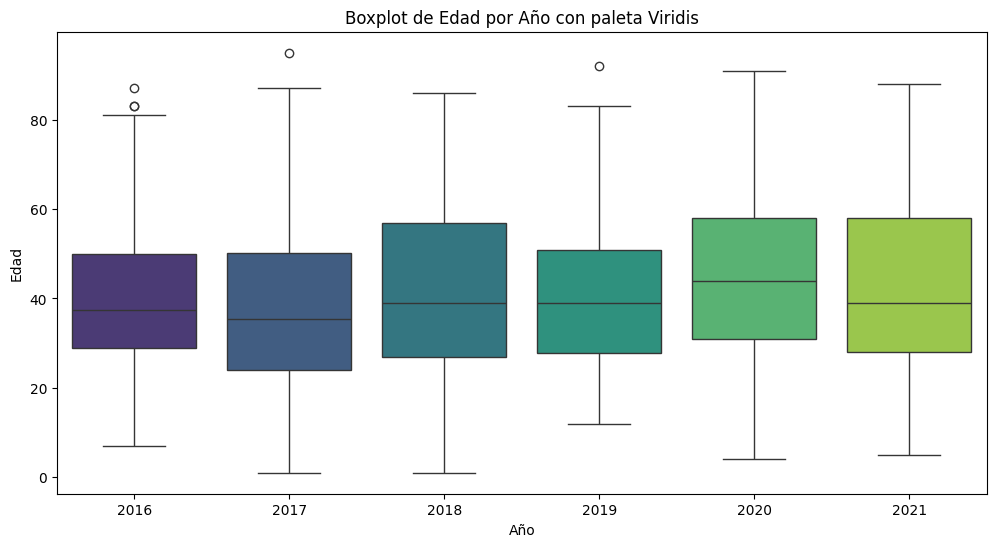

In [ ]:
# Configura el tamaño de la figura del gráfico para asegurar que el boxplot sea claramente visible y fácil de interpretar.
plt.figure(figsize=(12, 6))

# Crea un boxplot usando seaborn, que representa la distribución de las edades de las víctimas de homicidios para cada año disponible en el DataFrame 'df_homicidios'.
# 'x' define la variable categórica (Año), 'y' la variable numérica (Edad), y 'data' especifica el DataFrame de origen.
# La paleta 'viridis' se utiliza para colorear los boxplots, mejorando la estética y la legibilidad del gráfico.
sns.boxplot(x='Año', y='Edad', data=df_homicidios, palette='viridis')

# Establece el título del gráfico para proporcionar un contexto claro sobre lo que se está analizando.
plt.title('Boxplot de Edad por Año con paleta Viridis')

# Etiqueta el eje X como 'Año' para identificar claramente las categorías que representan los diferentes años en el gráfico.
plt.xlabel('Año')

# Etiqueta el eje Y como 'Edad' para indicar que las medidas en el gráfico se refieren a las edades de las víctimas de homicidios.
plt.ylabel('Edad')

# Muestra el gráfico. Esta función es necesaria para visualizar el boxplot en notebooks de Jupyter o en entornos de desarrollo de Python que no renderizan automáticamente la figura.
plt.show()


Las distribuciones de las edades se comportan muy parecido en los años registrados, con una mediana alrededor de los 40 años. Se observan algunos valores atípicos que tienen que ver con adultos mayores víctimas de los accidentes en los años 2016, 2017 y 2019.

### Distribucion de victimas por año y por genero

Analizaremos y visualizaremos la distribución de las víctimas de homicidios por género a lo largo de diferentes años, utilizando un DataFrame llamado df_homicidios. Al crear un gráfico de barras que separa los datos según el género para cada año, el código permite identificar tendencias y posibles patrones en la incidencia de homicidios, ofreciendo una visión clara de cómo las diferencias de género pueden influir en la victimización a lo largo del tiempo. Esta clase de análisis es crucial para los esfuerzos de prevención de la violencia, la planificación de recursos de seguridad y la implementación de políticas públicas dirigidas a combatir y prevenir el homicidio. Al utilizar la biblioteca de visualización Seaborn junto con Matplotlib, se mejora la estética y la legibilidad del gráfico, facilitando la interpretación de los datos y la comunicación de los hallazgos.

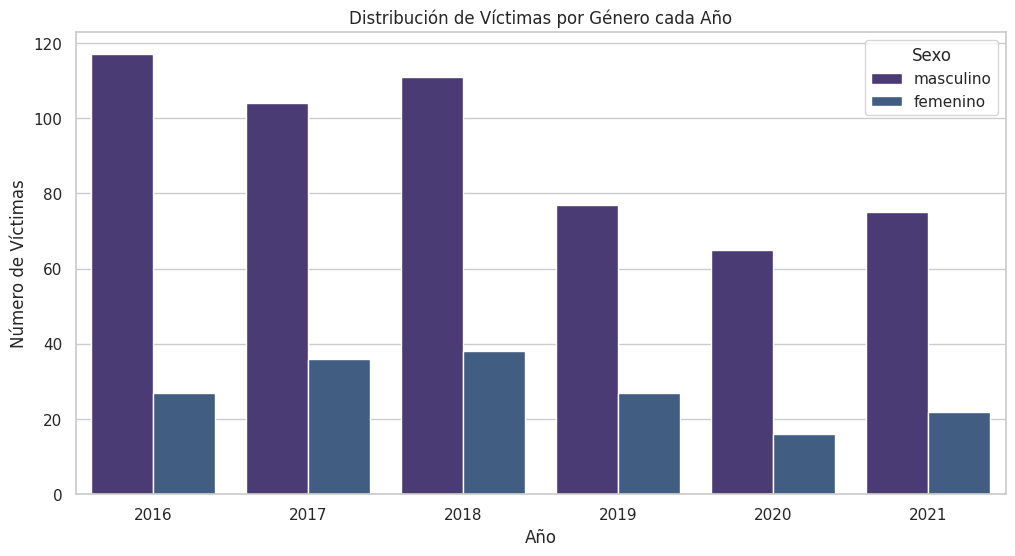

In [ ]:
# Convierte todos los valores en la columna 'Sexo' a minúsculas para asegurar la consistencia de los datos, facilitando la agrupación y comparación.
df_homicidios['Sexo'] = df_homicidios['Sexo'].str.lower()

# Establece un estilo de fondo para los gráficos generados con Seaborn, mejorando la estética visual.
sns.set(style="whitegrid")

# Configura el tamaño de la figura para el gráfico a 12 pulgadas de ancho por 6 pulgadas de alto, asegurando que el gráfico sea lo suficientemente grande para una lectura clara.
plt.figure(figsize=(12, 6))

# Establece la paleta de colores 'viridis' para todos los gráficos generados por Seaborn, proporcionando una gama de colores coherente y visualmente agradable.
sns.set_palette("viridis")

# Crea el gráfico de barras utilizando la función countplot de Seaborn, agrupando los datos por 'Año' y diferenciando las barras por 'Sexo'.
ax = sns.countplot(x='Año', hue='Sexo', data=df_homicidios)

# Configura las etiquetas del eje X como 'Año' y del eje Y como 'Número de Víctimas', clarificando lo que representa cada eje.
ax.set_xlabel('Año')
ax.set_ylabel('Número de Víctimas')

# Establece el título del gráfico como 'Distribución de Víctimas por Género cada Año', proporcionando un contexto inmediato sobre el propósito del gráfico.
ax.set_title('Distribución de Víctimas por Género cada Año')

# Finalmente, muestra el gráfico generado. Esta función es esencial para visualizar el gráfico en entornos como notebooks de Jupyter.
plt.show()


### Distribución de Víctimas por Género cada Año

Exploraremos la distribución de las edades de las víctimas de homicidios a lo largo de varios años, desglosada por género, a través de un gráfico de barras creado con Seaborn, una biblioteca de visualización de datos en Python. Al enfocarse en la edad promedio de las víctimas por año y diferenciar los datos según el género, este análisis busca identificar patrones o tendencias temporales en la victimización, lo cual puede revelar información valiosa sobre la demografía de las víctimas y cómo estas características pueden cambiar a lo largo del tiempo. Tal análisis es crucial para comprender la naturaleza de los homicidios y puede influir en el desarrollo de políticas públicas, estrategias de prevención y esfuerzos de intervención. Utilizando la paleta de colores 'viridis' y ajustes visuales específicos, el gráfico no solo pretende ser informativo sino también estéticamente agradable y claro para interpretar.

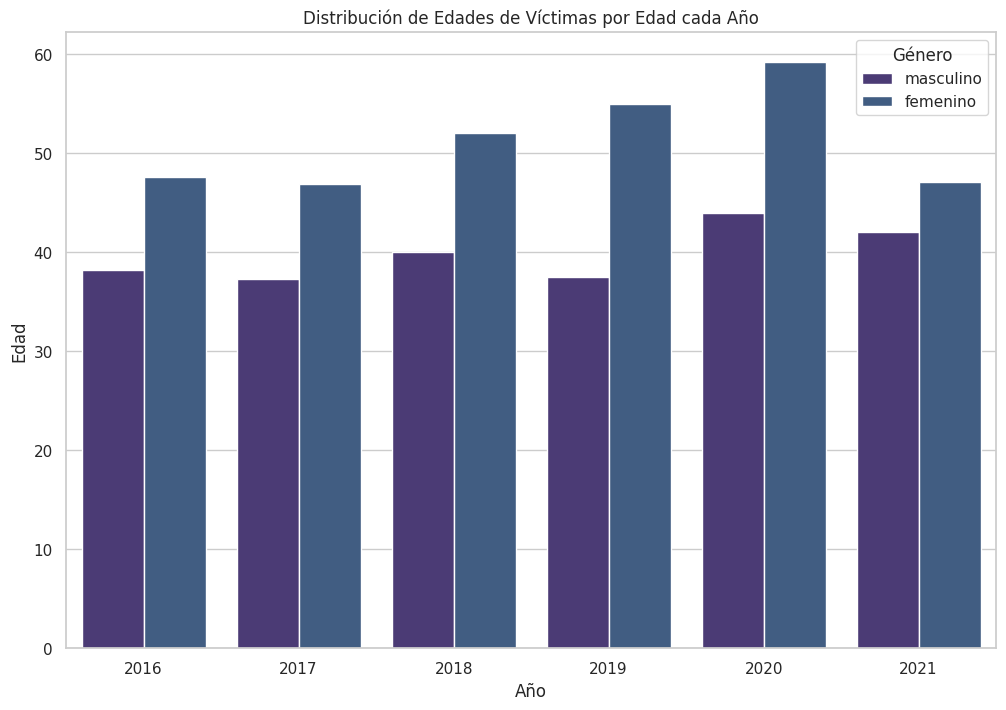

In [ ]:
# Configura el estilo del gráfico con un fondo de cuadrícula blanca, lo que mejora la legibilidad del gráfico.
sns.set(style="whitegrid")

# Establece el tamaño de la figura del gráfico a 12 pulgadas de ancho por 8 pulgadas de alto para asegurar que los detalles sean claramente visibles.
plt.figure(figsize=(12, 8))

# Aplica la paleta de colores 'viridis' para todos los gráficos creados con Seaborn en esta sesión, proporcionando una apariencia coherente y visualmente atractiva.
sns.set_palette("viridis")

# Crea un gráfico de barras que muestra la edad promedio de las víctimas por año, diferenciada por género.
# La opción 'ci=None' omite las barras de error para una visualización más limpia.
ax = sns.barplot(x='Año', y='Edad', hue='Sexo', data=df_homicidios, ci=None)

# Establece las etiquetas de los ejes X e Y para claridad, indicando que el gráfico muestra la distribución de las edades por año y por género.
ax.set_xlabel('Año')
ax.set_ylabel('Edad')

# Añade un título al gráfico, proporcionando un contexto inmediato sobre el contenido del análisis visual.
ax.set_title('Distribución de Edades de Víctimas por Edad cada Año')

# Ajusta la leyenda del gráfico para incluir un título ('Género') y mover su posición a la esquina superior derecha, facilitando la interpretación del gráfico sin obstruir los datos.
ax.legend(title='Género', loc='upper right')

# Muestra el gráfico. Este paso es esencial para que el gráfico sea visible en el entorno de ejecución, como un cuaderno Jupyter.
plt.show()


En el gráfico anterior se puede ver que hasta el 2020 había una tendencia creciente en las edades de las mujeres fallecidas que en hombres, con edades entre los 40 y 50 años, disminuyendo para 2021. En cuanto a los hombres, se observa una leve tendencia al aumento de la edad de fallecimientos pero sostenida alrededor de los 40 años de edad, pero igualmente menor edad que en mujeres.

Ahora vamos a entender cómo la cantidad de estos incidentes varía según el año y el género de las víctimas. Al agrupar los datos primero por 'Año' y luego por 'Sexo', y luego contar el número de registros en cada grupo, podemos obtener una vista consolidada que revela patrones o tendencias significativas en la incidencia de homicidios a lo largo del tiempo, desglosada por género. Este tipo de análisis es crucial para investigaciones en el ámbito de la criminología, la planificación de políticas de seguridad pública, y esfuerzos dirigidos a la prevención de la violencia. Proporciona una base para comprender mejor las dinámicas sociales y puede ayudar a dirigir recursos y estrategias de manera más efectiva hacia las poblaciones más afectadas.

In [ ]:
# Agrupa los datos del DataFrame 'df_homicidios' por las columnas 'Año' y 'Sexo'.
# Esto organiza los datos de manera que cada combinación única de año y sexo tenga su propio grupo.
df_resultado = df_homicidios.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad homicidios')

# La función .size() cuenta el número de registros en cada grupo formado por la combinación de 'Año' y 'Sexo'.
# .reset_index(name='Cantidad homicidios') convierte el resultado en un DataFrame y renombra la columna de conteo a 'Cantidad homicidios'.

# Finalmente, el DataFrame resultante, 'df_resultado', se muestra en la salida.
# Este DataFrame contiene tres columnas: 'Año', 'Sexo', y 'Cantidad homicidios', proporcionando una visión clara de la cantidad de homicidios registrados,
# categorizados tanto por año como por género.
df_resultado


,Año,Sexo,Cantidad homicidios
0,2016,femenino,27
1,2016,masculino,117
2,2017,femenino,36
3,2017,masculino,104
4,2018,femenino,38
5,2018,masculino,111
6,2019,femenino,27
7,2019,masculino,77
8,2020,femenino,16
9,2020,masculino,65


### Dispersión de las edades segun el rol

Nos centraremos en analizar y visualizar la dispersión de edades entre diferentes roles involucrados en incidentes de homicidios, utilizando un DataFrame df_homicidios. El análisis calcula la edad promedio y la desviación estándar (como medida de dispersión) de las edades para cada rol, proporcionando una visión de la variabilidad de edades dentro de cada categoría de rol. Este enfoque es particularmente útil para entender la demografía de los involucrados en estos incidentes, permitiendo a los investigadores, planificadores de políticas, y otras partes interesadas identificar si ciertos roles tienden a estar asociados con grupos de edad específicos y cuán heterogéneos son estos grupos. La visualización utiliza barras horizontales para representar la dispersión alrededor del promedio, ofreciendo una interpretación gráfica intuitiva de la distribución de edades para cada rol.

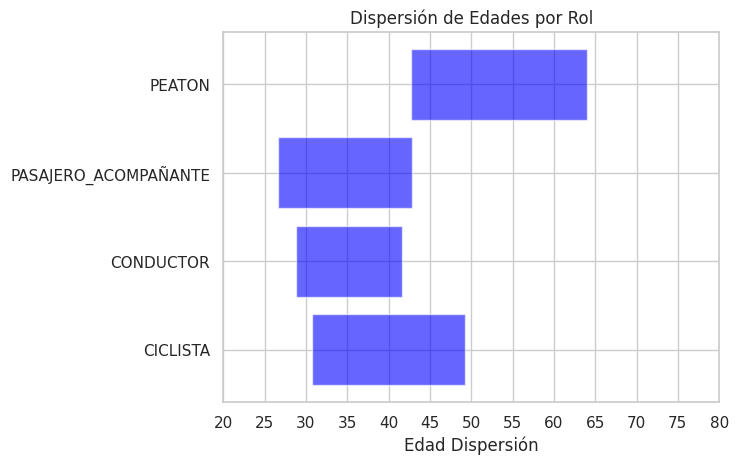

In [ ]:
# Agrupa el DataFrame 'df_homicidios' por 'Rol' y calcula la media ('mean') y la desviación estándar ('std') de la columna 'Edad'.
summary_data = df_homicidios.groupby('Rol')['Edad'].agg(['mean', 'std']).reset_index()

# Prepara una figura y un eje para el gráfico de Matplotlib, estableciendo el espacio para el gráfico que se generará.
fig, ax = plt.subplots()

# Itera a través de cada fila del DataFrame resumen para dibujar una barra horizontal por cada rol.
# La barra representa la dispersión de edades (desviación estándar) alrededor del promedio, ajustando la posición de la barra para centrarla en el promedio.
for index, row in summary_data.iterrows():
    rol = row['Rol']
    edad_promedio = row['mean']
    dispersion = row['std']

    # Dibuja cada barra horizontal. La posición de inicio de cada barra se ajusta para centrarla en el promedio de edad.
    ax.barh(rol, dispersion, left=edad_promedio-dispersion/2, color='blue', alpha=0.6)

# Configura la etiqueta del eje X y el título del gráfico para proporcionar contexto.
ax.set_xlabel('Edad Dispersión')
ax.set_title('Dispersión de Edades por Rol')

# Ajusta el rango del eje X para abarcar un rango específico de edades y configura los ticks y etiquetas del eje X para mejorar la legibilidad.
ax.set_xlim(20, 80)
ax.set_xticks(np.arange(20, 81, 5))
ax.set_xticklabels(np.arange(20, 81, 5))

# Muestra el gráfico finalizado. Esta línea es esencial para que el gráfico se renderice y sea visible.
plt.show()



Al analizar las edades promedio en los cuatro roles estudiados, se nota que los conductores de autos y los pasajeros acompañantes tienen edades promedio similares, aproximadamente 35 años. Se registra que la edad mínima para los conductores es alrededor de los 18 años, mientras que en los otros roles se pueden encontrar víctimas más jóvenes, incluyendo niños que son transportados.

Para los peatones, la variabilidad de las edades es más amplia, pero apuntando a adultos y adultos mayores mayoritariamente.

Aunque en los roles de conductor y pasajero acompañante se presentan algunas edades atípicas, estas se encuentran dentro de un rango esperable y se tratan como casos particulares dentro del conjunto de datos.

### Dispersión de las edades y en la movilización de las víctimas

Este código proporciona un análisis visual de la edad promedio y la variabilidad (dispersión) de las edades de las víctimas de homicidios, agrupadas por alguna clasificación específica de "Víctima". Al calcular tanto la media como la desviación estándar de la edad para cada categoría de víctima y visualizar estos datos mediante barras horizontales, el análisis busca identificar patrones de victimización por edad y la consistencia de estos patrones dentro de cada grupo de víctimas. Esta aproximación es útil para comprender mejor las dinámicas de riesgo asociadas con diferentes segmentos de la población y podría informar tanto a la investigación académica como a las políticas públicas en materia de prevención de la violencia y la criminalidad. La utilización del esquema de colores "viridis" para las barras no solo mejora la claridad visual del gráfico sino que también aporta una dimensión adicional al análisis, permitiendo una diferenciación más intuitiva entre las categorías de víctimas.

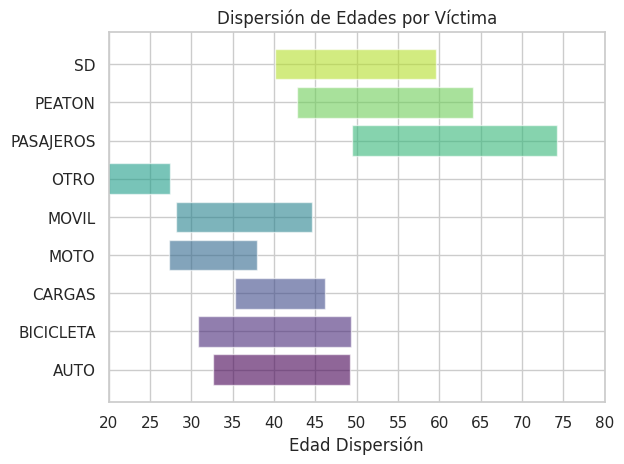

In [ ]:
# Agrupa el DataFrame 'df_homicidios' por la categoría 'Víctima' y calcula el promedio ('mean') y la desviación estándar ('std') de la edad.
summary_data = df_homicidios.groupby('Víctima')['Edad'].agg(['mean', 'std']).reset_index()

# Prepara una nueva figura y un eje para el gráfico, proporcionando un lienzo sobre el cual dibujar.
fig, ax = plt.subplots()

# Itera a través de cada fila del DataFrame resumen para dibujar una serie de barras horizontales.
# Cada barra representa la dispersión de edades para una categoría específica de víctima, centrada en torno al promedio de edad.
for index, row in summary_data.iterrows():
    rol = row['Víctima']
    edad_promedio = row['mean']
    dispersion = row['std']

    # Dibuja cada barra horizontal usando el esquema de colores "viridis", asignando un color único a cada categoría de víctima basado en su posición en el DataFrame.
    ax.barh(rol, dispersion, left=edad_promedio-dispersion/2, color=plt.cm.viridis(index/len(summary_data)), alpha=0.6)

# Configura las etiquetas del eje X y el título del gráfico para proporcionar contexto y claridad a la visualización.
ax.set_xlabel('Edad Dispersión')
ax.set_title('Dispersión de Edades por Víctima')

# Ajusta el rango del eje X para abarcar un espectro de edades específico y configura los ticks y las etiquetas del eje X para facilitar la interpretación de los datos.
ax.set_xlim(20, 80)
ax.set_xticks(np.arange(20, 81, 5))
ax.set_xticklabels(np.arange(20, 81, 5))

# Muestra el gráfico finalizado, permitiendo una visualización interactiva o estática dependiendo del entorno de ejecución.
plt.show()


### Cantidad de victimas en tipo de calle y en cruce


El siguiente codigo está diseñado para proporcionar un análisis estadístico detallado de las edades de las víctimas de homicidios, segmentado por categorías de víctimas dentro de un conjunto de datos. Al calcular tanto la edad promedio como la desviación estándar de las edades para cada categoría de víctima, el análisis ofrece una visión profunda de las características demográficas de las víctimas en diferentes contextos o circunstancias de homicidios. Este tipo de análisis es fundamental para comprender las dinámicas de la violencia y puede ser instrumental en la formulación de políticas de prevención específicas, intervenciones dirigidas y esfuerzos de investigación focalizados. Además, al revelar la variabilidad de las edades dentro de cada categoría, este enfoque ayuda a identificar si ciertos grupos de víctimas presentan rangos de edad más amplios o más estrechos, lo cual puede indicar diferencias en la vulnerabilidad o en los factores de riesgo asociados con diversos perfiles de víctimas.

In [ ]:
# Agrupa el DataFrame 'df_homicidios' por la columna 'Víctima' para analizar las edades de las víctimas en cada categoría.
summary_data = df_homicidios.groupby('Víctima')['Edad'].agg(['mean', 'std']).reset_index()

# Renombra las columnas del DataFrame resultante para mejorar la claridad: 'mean' a 'Edad Promedio' y 'std' a 'Desviación Estándar'.
summary_data = summary_data.rename(columns={'mean': 'Edad Promedio', 'std': 'Desviación Estándar'})

# Imprime el DataFrame resultante para visualizar los resultados del análisis.
print(summary_data)


     Víctima  Edad Promedio  Desviación Estándar
0       AUTO      40.902174            16.564930
1  BICICLETA      40.034483            18.486448
2     CARGAS      40.714286            10.904346
3       MOTO      32.602649            10.666543
4      MOVIL      36.333333            16.441817
5       OTRO      21.500000            11.902381
6  PASAJEROS      61.800000            24.752778
7     PEATON      53.400000            21.280379
8         SD      49.875000            19.438089


### Lugar donde mas ocurren los accidentes

Ahora nos centramos en la visualización y el análisis de la cantidad de víctimas de incidentes (posiblemente accidentes de tráfico) basado en dos categorías específicas: el tipo de calle y la presencia en cruces. Utilizando la biblioteca Seaborn para crear gráficos de barras y Matplotlib para configurar la presentación, el código ilustra cómo la distribución de las víctimas varía según estas dos categorías. Este análisis puede ser particularmente útil para la planificación urbana, la seguridad vial y la implementación de medidas preventivas en áreas críticas identificadas. A continuación, se comenta el código línea por línea para detallar su funcionamiento y propósito.

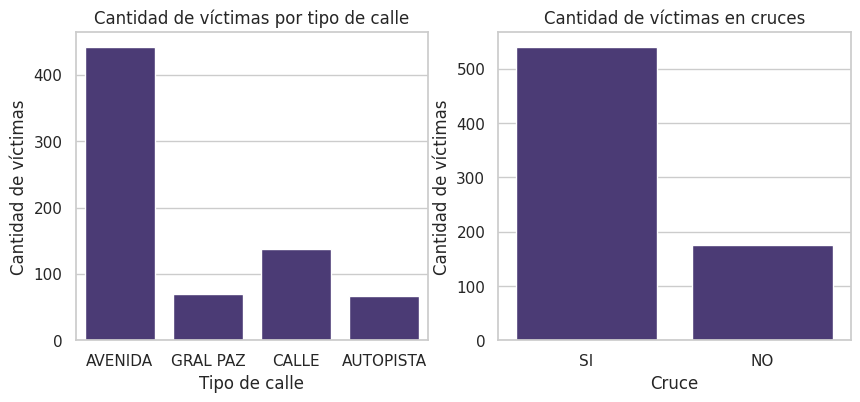

In [ ]:
# Prepara la figura y los ejes para dos subgráficos, con un tamaño total de 10x4 pulgadas.
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Crea el primer gráfico de barras en el primer eje (axes[0]), mostrando la cantidad de víctimas por tipo de calle.
# Se especifica el DataFrame `df`, la columna 'Tipo de calle' como variable en el eje x, y se asigna este gráfico al primer eje.
sns.countplot(data=df_homicidios, x='Tipo de calle', ax=axes[0])

# Configura el título y la etiqueta del eje y para el primer gráfico, mejorando la claridad y la interpretación del gráfico.
axes[0].set_title('Cantidad de víctimas por tipo de calle')
axes[0].set_ylabel('Cantidad de víctimas')

# Crea el segundo gráfico de barras en el segundo eje (axes[1]), mostrando la cantidad de víctimas en cruces.
# Al igual que el primer gráfico, se asigna a la variable 'Cruce' en el eje x y se visualiza en el segundo eje.
sns.countplot(data=df_homicidios, x='Cruce', ax=axes[1])

# Configura el título y la etiqueta del eje y para el segundo gráfico, siguiendo el mismo propósito de claridad y facilitación de interpretación.
axes[1].set_title('Cantidad de víctimas en cruces')
axes[1].set_ylabel('Cantidad de víctimas')

# Muestra los gráficos configurados, permitiendo la visualización de los datos analizados.
plt.show()


La tendencia indica que las avenidas, y más específicamente los cruces de calles, son los lugares donde se concentra una mayor cantidad de accidentes con víctimas fatales. Esto sugiere que las intersecciones en las avenidas presentan riesgos significativos para la seguridad vial, posiblemente debido a factores como el alto flujo de vehículos, la mezcla de distintos tipos de tráfico (como peatones, bicicletas y vehículos motorizados), y la complejidad de las señalizaciones y normas de tránsito. Estas áreas, al ser puntos de convergencia de diferentes direcciones y velocidades, aumentan las probabilidades de conflictos y colisiones, subrayando la importancia de implementar medidas de seguridad y regulaciones específicas para mitigar los riesgos y proteger a los usuarios de la vía.

### Acusados en los hechos

Por último veremos la frecuencia de acusados en un conjunto de datos relacionado con incidentes o hechos judiciales, clasificados por 'Acusado'. A través de un gráfico de barras, se busca presentar de manera clara cuántas veces cada acusado aparece en el dataset, proporcionando una perspectiva visual de los acusados más frecuentes. Este análisis puede ser útil para identificar patrones o tendencias en los datos, como por ejemplo, si ciertos individuos o entidades son acusados con mayor frecuencia que otros, lo cual podría sugerir áreas de interés para investigaciones adicionales o para la toma de decisiones en el ámbito legal o de seguridad pública.

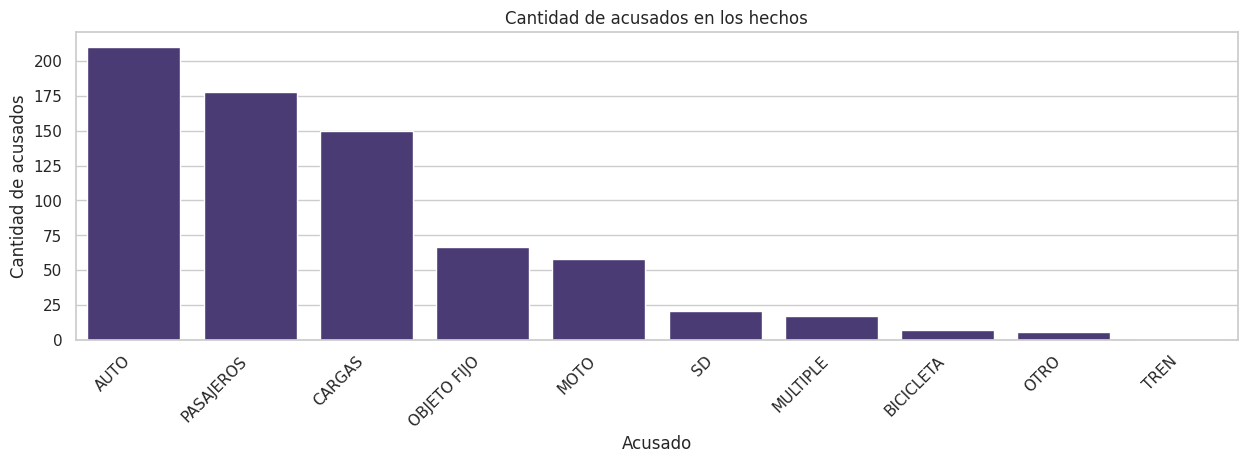

In [ ]:
# Ordena los datos por 'Acusado', contando las ocurrencias de cada uno y reseteando el índice para facilitar el manejo de datos.
ordenado = df_homicidios['Acusado'].value_counts().reset_index()

# Cambia el nombre de las columnas para reflejar correctamente los datos: la columna 'index' a 'Acusado' y 'Acusado' a 'count'.
ordenado = ordenado.rename(columns={'index': 'Acusado', 'Acusado': 'count'})

# Configura el tamaño de la figura para el gráfico, asegurando suficiente espacio para una visualización clara.
plt.figure(figsize=(15, 4))

# Crea un gráfico de barras utilizando Seaborn, pasando el DataFrame ordenado y especificando las columnas para los ejes X e Y.
ax = sns.barplot(data=ordenado, x='Acusado', y='count', order=ordenado['Acusado'])

# Configura el título y las etiquetas del gráfico para proporcionar contexto y claridad a la visualización.
ax.set_title('Cantidad de acusados en los hechos')
ax.set_ylabel('Cantidad de acusados')

# Ajusta la orientación de las etiquetas del eje X para mejorar la legibilidad, rotándolas 45 grados.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Muestra el gráfico generado, permitiendo la visualización de los datos analizados.
plt.show()


Del análisis de este gráfico se deduce que los conductores de automóviles tienen la mayor responsabilidad en los incidentes registrados, seguidos por los pasajeros y, posteriormente, por los vehículos de carga. Esto concuerda con las observaciones previas, especialmente en situaciones donde el vehículo implicado es de transporte público, explicando así la relación entre la responsabilidad atribuida a los pasajeros y las conclusiones discutidas anteriormente.